In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.optimize import curve_fit
plt.style.use('science')
import comphy

In [2]:
def f1(t,x):
    y = -x*t
    return y

In [3]:

a = 0 # t_initial 
b = 1# t final
h = 0.01# step size
N = int(1+ (b-a)/h)
xval = np.arange(a,b+h/2,h)
y0 = np.array([1.0])

In [15]:
y_exact = np.exp(-(xval**2)/2)

In [5]:
y_euler = comphy.call(comphy.euler,a,b,N,y0,f1)
y_mid = comphy.call(comphy.midpoint,a,b,N,y0,f1)
y_rk4 = comphy.call(comphy.rk4,a,b,N,y0,f1)

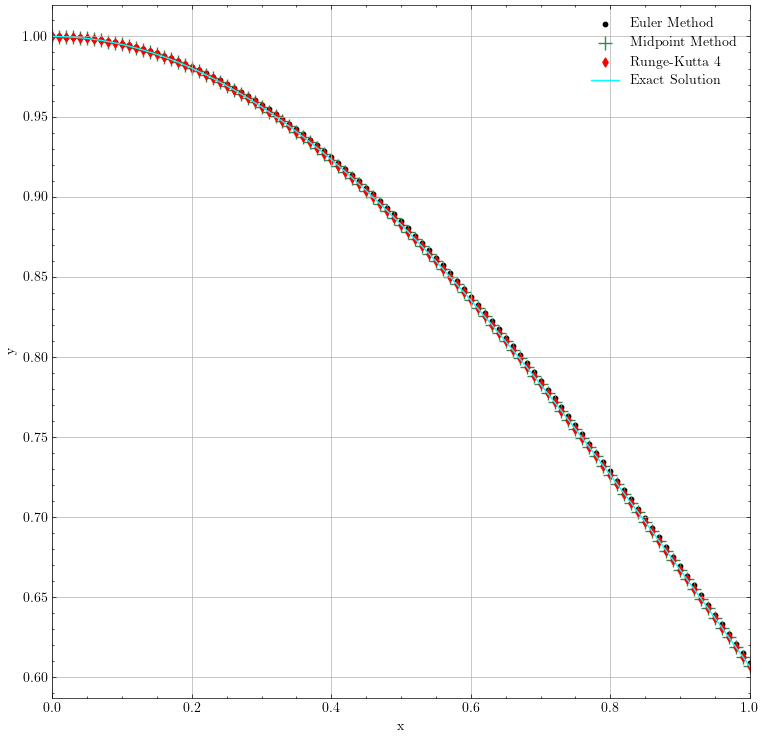

In [14]:
fig,axes = plt.subplots(1,1,figsize=(9,9), dpi=100)
axes.set_xlim([a,b])
axes.scatter(xval, y_euler, color ="black",label = "Euler Method", s=10)
axes.scatter(xval, y_mid, color= "seagreen", label = "Midpoint Method", marker= "+",s=100)
axes.scatter(xval, y_rk4, color = "red", label = "Runge-Kutta 4", marker = "d",s=20)
axes.plot(xval,y_exact, color = "cyan", label = "Exact Solution")
axes.grid()
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend()

In [16]:
def f2(x,y):
    f = np.array([y[1],-4*np.pi**2*y[0]])
    return f

In [22]:
h = 0.01
t0 = 0.0
t1 = 14.75

N = int(1+ (t1-t0)/h)

xs = np.arange(t0, t1+h/2, h)  # Generate range of x values

y_ini = np.asarray([1.0, 0.0])  # Initial condition

# Call the methods
ysE =   comphy.call(comphy.euler, t0,t1,N, y_ini, f=f2)
ysm =   comphy.call(comphy.midpoint, t0,t1,N,y_ini, f=f2)
ysrk4 = comphy.call(comphy.rk4, t0,t1,N,y_ini,f=f2)

In [23]:
y_ex = np.cos(2*np.pi*xs)
p_ex = -2*np.pi*np.sin(2*np.pi*xs)

In [25]:
M = 1
K = 4*np.pi**2

Ee = 0.5*M*ysE[:,1]**2 + 0.5*K*ysE[:,0]**2
Em = 0.5*M*ysm[:,1]**2 + 0.5*K*ysm[:,0]**2
Erk4 = 0.5*M*ysrk4[:,1]**2 + 0.5*K*ysrk4[:,0]**2 

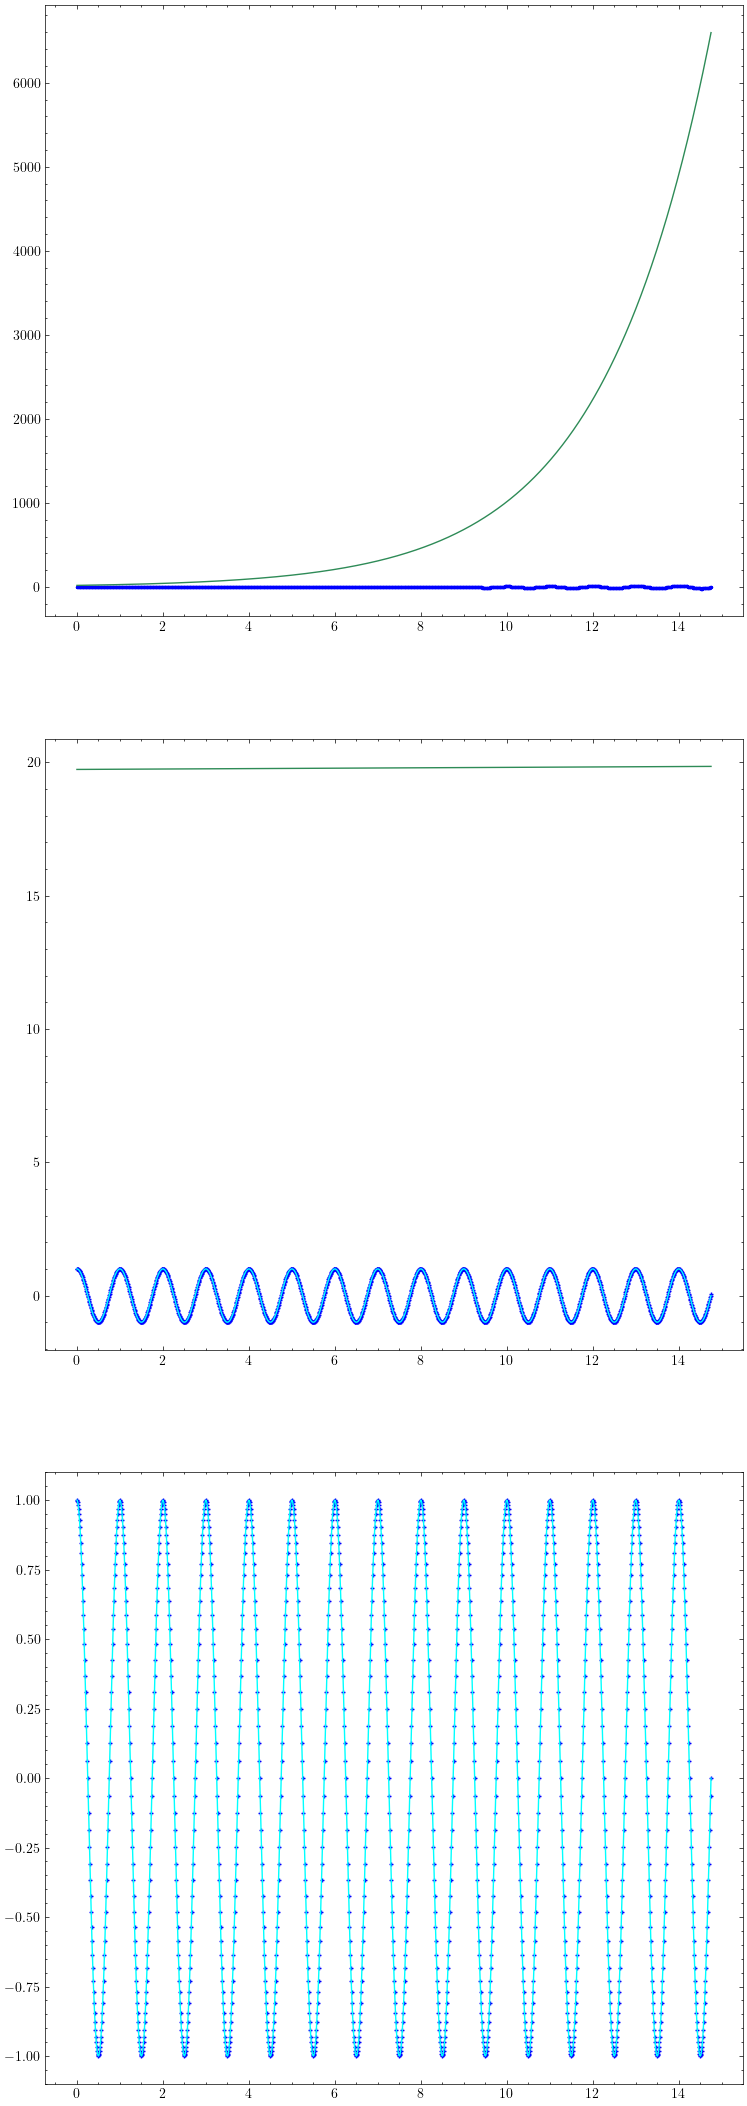

In [27]:
fig3,axes3 = plt.subplots(3,1,figsize=(9,9*3), dpi=100)
axes3[0].scatter(xs, ysE[:,0], color ="blue",label = "Euler Method for y ", s=2)
# axes3[0].scatter(xs, ysE[:,1], color ="red",label = "Euler Method for p ", s=1)
# axes3[0].plot(xs,y_ex, color = "cyan", label = "Exact Solution for y ")
axes3[0].plot(xs,Ee, color = "seagreen", label = "Exact Solution for p ")
# axes3[0].plot(xs,p_ex, color = "seagreen", label = "Exact Solution for p ")

axes3[1].scatter(xs, ysm[:,0], color= "blue", label = "Midpoint Method for y ", marker= "+",s=5)
# axes3[1].scatter(xs, ysm[:,1], color= "red", label = "Midpoint Method for p ", marker= "+",s=10)
axes3[1].plot(xs,y_ex, color = "cyan", label = "Exact Solution for y ")
axes3[1].plot(xs,Em, color = "seagreen", label = "Energy ")
# axes3[1].plot(xs,p_ex, color = "seagreen", label = "Exact Solution for p ")

axes3[2].scatter(xs, ysrk4[:,0], color= "blue", label = "Runge Kutta Method for y ", marker= "+",s=5)
# axes3[2].scatter(xs, ysrk4[:,1], color= "red", label = "Runge Kutta Method for p ", marker= "+",s=10)
axes3[2].plot(xs,y_ex, color = "cyan", label = "Exact Solution")
# axes3[2].plot(xs,p_ex, color = "seagreen", label = "Exact Solution")
